# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy
import matplotlib.pyplot as plt


---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

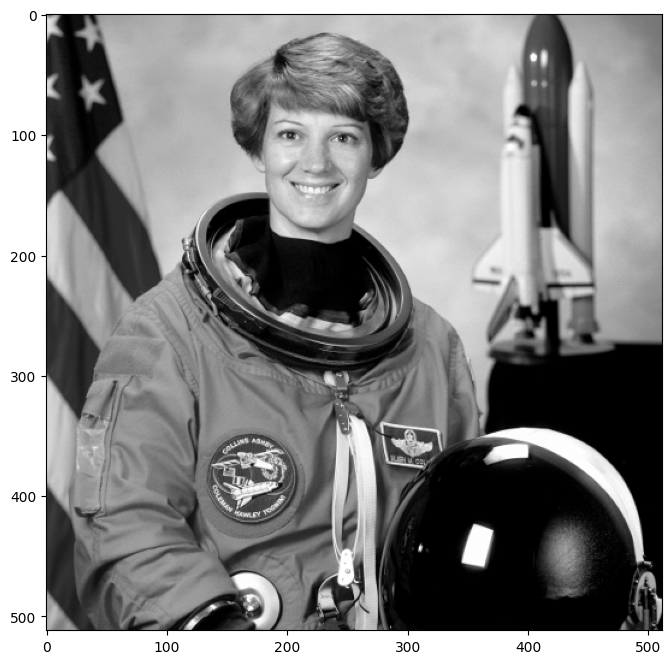

In [2]:
img=plt.imread('data/astronaut.png')
plt.figure(figsize=(15,8))
plt.imshow(img, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [3]:
imgmean= img.copy()
def meanfilter(imgmean, size):
    result = numpy.zeros(imgmean.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(imgmean.shape):
        if p[0] >= n and p[0]<imgmean.shape[0]-n and p[1]>=n and p[1]<imgmean.shape[1]-n:
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size):
                neighborhood_sum=imgmean[p[0]+q[0]-n,p[1]+q[1]-n]+neighborhood_sum
            mean= neighborhood_sum/size**2
            result[p]=mean
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

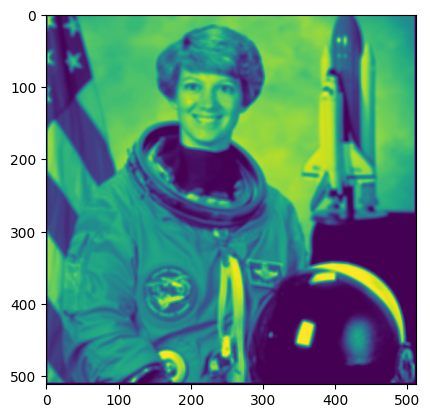

In [4]:

plt.imshow(meanfilter(imgmean, 5))
img3=meanfilter(imgmean, 5)

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [5]:
img5=plt.imread('data/astronaut_meanfilter5.png')
assert numpy.allclose(img3,img5, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [9]:
imgmedian= img.copy()
def medianfilter(imgmedian, size):
    result = numpy.zeros(img.shape)
    # write your code here
    n = (size - 1) // 2
    for p in numpy.ndindex(imgmedian.shape):
        if p[0] >= n and p[0]<imgmedian.shape[0]-n and p[1]>=n and p[1]<imgmedian.shape[1]-n:
            intensities = list()
            for q in numpy.ndindex(size, size):
                i = imgmedian[p[0]+q[0]-n,p[1]+q[1]-n]
                intensities.append(i)
            intensities.sort()  
            result[p]=intensities[len(intensities)//2] 
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

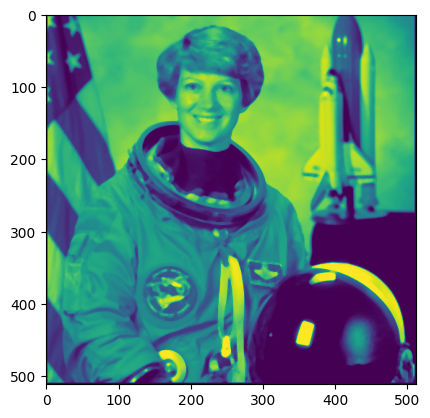

In [12]:

imgmedian3=medianfilter(imgmedian, 5)
plt.imshow(imgmedian3)


Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [13]:
imgmedian5=plt.imread('data/astronaut_medianfilter5.png')
assert numpy.allclose(imgmedian3,imgmedian5, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [54]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

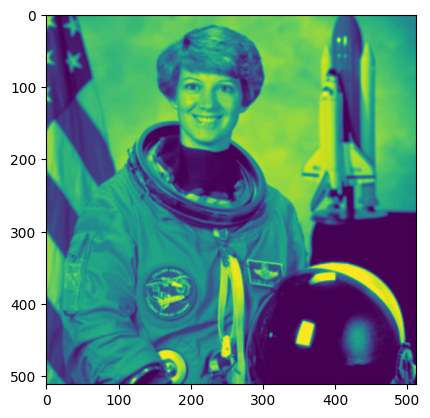

In [55]:
imgmean2=img.copy()
plt.imshow(scipy.ndimage.uniform_filter(imgmean2, 3))


**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

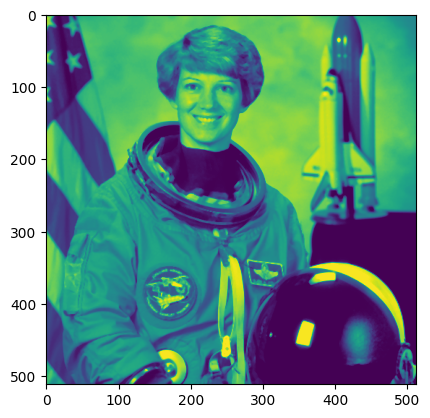

In [64]:
imgmedian2=img.copy()
plt.imshow(scipy.ndimage.median_filter(imgmedian2, 3))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

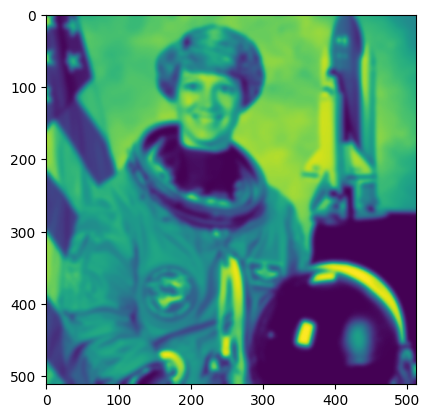

In [65]:
imggaussian=img.copy()
plt.imshow(scipy.ndimage.gaussian_filter(imggaussian, 3))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: